# Testing Fruit Classification Model

This notebook tests the trained model on the test dataset.

In [31]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Setup and Configuration

In [32]:
# Directory setup
BASE_DIR = "/home/heangchihav/Documents/NMU/MachineLearning/machine_learning"
MODEL_DIR = os.path.join(BASE_DIR, "models")
TEST_DIR = os.path.join(BASE_DIR, "data/preprocessed/test")
CATEGORIES = ["grape", "apple"]
IMG_SIZE = 50  # Same as training

# Verify paths
print(f"Model exists: {os.path.exists(os.path.join(MODEL_DIR, 'fruit_classifier.h5'))}")
print(f"Test directory exists: {os.path.exists(TEST_DIR)}")

Model exists: True
Test directory exists: True


## Load Test Data

In [33]:
def load_test_data():
    test_data = []
    test_labels = []
    
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR, category)
        class_num = CATEGORIES.index(category)
        
        print(f"Loading {category} images...")
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                test_data.append(img_resized)
                test_labels.append(class_num)
            except Exception as e:
                print(f"Error loading {img_name}: {e}")
    
    # Convert to numpy arrays and normalize
    X_test = np.array(test_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    y_test = np.array(test_labels)
    
    print(f"\nLoaded {len(X_test)} test images")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    return X_test, y_test

X_test, y_test = load_test_data()

Loading grape images...
Loading apple images...

Loaded 448 test images
X_test shape: (448, 50, 50, 1)
y_test shape: (448,)


## Load Model and Make Predictions

In [34]:
# Load the trained model
model = load_model(os.path.join(MODEL_DIR, 'fruit_classifier.h5'))
print("Model loaded successfully!")

# Make predictions on test data
predictions = model.predict(X_test)
print("Raw predictions shape:", predictions.shape)

# Get the predicted class (index of the maximum probability)
predicted_classes = np.argmax(predictions, axis=1)
print("Final predicted_classes shape:", predicted_classes.shape)
print("y_test shape:", y_test.shape)

Model loaded successfully!
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Raw predictions shape: (448, 2)
Final predicted_classes shape: (448,)
y_test shape: (448,)


## Evaluate Model Performance

Classification Report:
              precision    recall  f1-score   support

       grape       0.70      0.99      0.82       207
       apple       0.99      0.63      0.77       241

    accuracy                           0.80       448
   macro avg       0.84      0.81      0.79       448
weighted avg       0.85      0.80      0.79       448



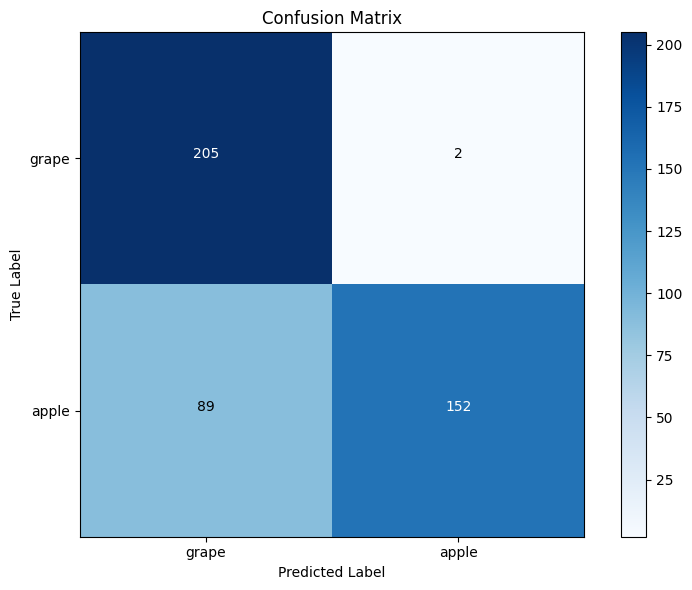

In [35]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes, target_names=CATEGORIES))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add labels
tick_marks = np.arange(len(CATEGORIES))
plt.xticks(tick_marks, CATEGORIES)
plt.yticks(tick_marks, CATEGORIES)

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## Visualize Some Predictions

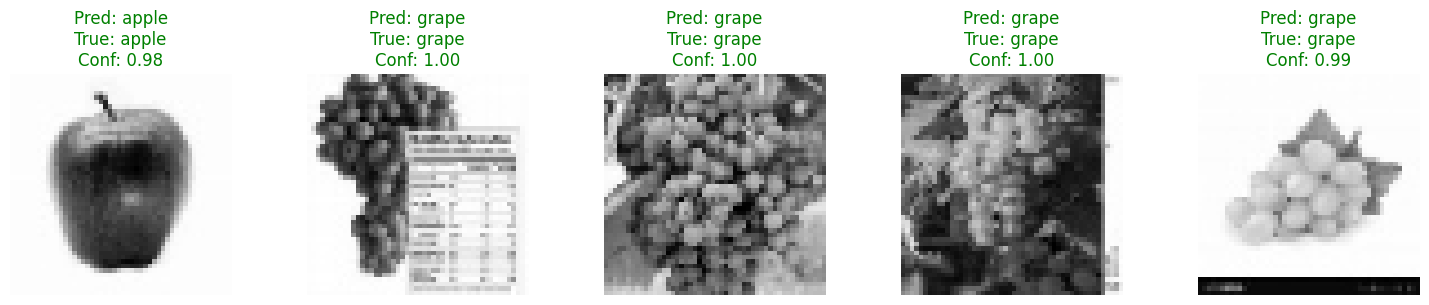

In [36]:
def plot_predictions(num_images=5):
    plt.figure(figsize=(15, 3))
    
    # Get random indices
    indices = np.random.randint(0, len(X_test), num_images)
    
    for i, idx in enumerate(indices, 1):
        plt.subplot(1, num_images, i)
        
        # Display image
        plt.imshow(X_test[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
        
        # Get prediction
        pred_class = CATEGORIES[predicted_classes[idx]]
        true_class = CATEGORIES[y_test[idx]]
        
        # Get confidence from raw predictions
        confidence = predictions[idx][predicted_classes[idx]]
        
        # Set title color based on correctness
        color = 'green' if pred_class == true_class else 'red'
        
        plt.title(f'Pred: {pred_class}\nTrue: {true_class}\nConf: {confidence:.2f}', 
                  color=color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot some random predictions
plot_predictions()

## Test Individual Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


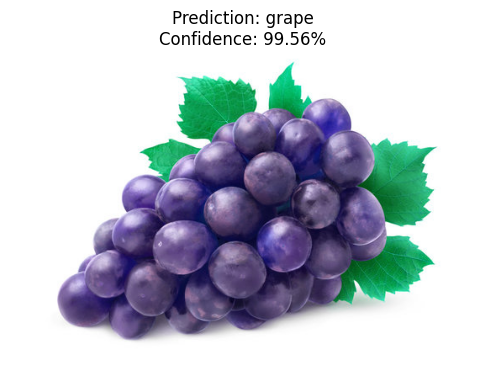

In [38]:
def predict_single_image(image_path):
    # Read and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_array = np.array(img_resized).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    
    # Make prediction
    pred = model.predict(img_array)[0]
    pred_class = CATEGORIES[np.argmax(pred)]
    confidence = pred[np.argmax(pred)]
    
    # Display results
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.imread(image_path))
    plt.title(f'Prediction: {pred_class}\nConfidence: {confidence*100:.2f}%')
    plt.axis('off')
    plt.show()

# Example: Test a single image
test_image_path = "/home/heangchihav/Downloads/testgg.jpg"
predict_single_image(test_image_path)